In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
# Importamos el dataset para entrenar
data = pd.read_excel('Data\E-Commerce_train.xlsx')

In [47]:
#Exploramos los datos para familiarizarnos con las columnas y su contenido
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [45]:
#Buscar datos faltantes 
True in data.isnull().values

False

In [44]:
#Revisamos las variables categóricas en busca de valores incorrectos
print(data['Warehouse_block'].unique())
print(data['Mode_of_Shipment'].unique())
print(data['Product_importance'].unique())
print(data['Gender'].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [40]:
# Se buscan outliers o comportamientos atípicos
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [12]:
#Separamos las variables numéricas de las categóricas para tratar las categóricas
numerica = data.drop(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)
numerica.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


In [13]:
categoricas = data.filter(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])
categoricas.head()

,ID,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,1,D,Flight,low,F
1,2,F,Flight,low,M
2,3,A,Flight,low,M
3,4,B,Flight,medium,M
4,5,C,Flight,medium,F


In [48]:
cat_numericas = pd.get_dummies(categoricas, drop_first=True)
cat_numericas.head()

,ID,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,0,0,1,0,0,0,1,0,0
1,2,0,0,0,1,0,0,1,0,1
2,3,0,0,0,0,0,0,1,0,1
3,4,1,0,0,0,0,0,0,1,1
4,5,0,1,0,0,0,0,0,1,0


In [49]:
datos_bin = pd.concat([numerica,cat_numericas],axis=1)
datos_bin.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,ID,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,1,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,2,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,3,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,4,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,5,0,1,0,0,0,0,0,1,0


In [50]:
X = datos_bin.drop('Reached.on.Time_Y.N', axis=1)
y = datos_bin['Reached.on.Time_Y.N']

In [51]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X, y,random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit (X_train)

StandardScaler()

In [53]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
print(X_train.shape, X_test.shape)

(6749, 16) (2250, 16)


In [80]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (1000,1000) , max_iter = 600)

In [81]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(1000, 1000), max_iter=600)

In [82]:
predictions = mlp.predict (X_test)

[[ 434  351]
 [ 335 1130]]


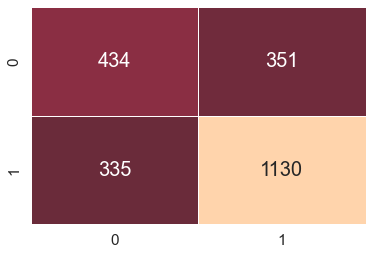

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
cmatrix = confusion_matrix(y_test, predictions)
cmPd = pd.DataFrame(cmatrix)

#Graficamos la matriz de confusión
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1.4) # for label size
sn.heatmap(cmPd,annot=True,annot_kws={"size":20},fmt='g',center=0,linewidths=1,cbar=False)
plt.show()

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % recall_score(y_test, predictions))

Precision: 0.771
